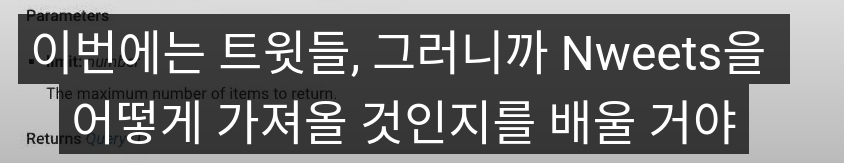

# Home.js
```jsx
import { useState, useEffect } from "react";

// firestore - https://firebase.google.com/docs/firestore/quickstart?hl=ko#web-version-9
import { collection, addDoc, getDocs, query } from "firebase/firestore";
import { dbService } from "fbase";

function Home() {
  const [jweet, setJweet] = useState("");
  const [jweets, setJweets] = useState([]);

  const getJweets = async () => {
    const q = query(collection(dbService, "jweets"));
    const querySnapshot = await getDocs(q);
    querySnapshot.forEach((doc) => {
      const jweetObj = {
        ...doc.data(),
        id: doc.id,
      };
      console.log(jweetObj);
      setJweets((prev) => [jweetObj, ...prev]);
    });
  };

  useEffect(() => {
    getJweets();
    console.log(jweets);
  }, []);

  const onSubmit = async (event) => {
    event.preventDefault();
    if (!jweet) {
      return;
    }
    // 저장
    try {
      const docRef = await addDoc(collection(dbService, "jweets"), {
        jweet,
        createdAt: Date.now(),
      });
      // console.log("Document written with ID :", docRef.id);
    } catch (error) {
      console.log(error.message);
    }
    setJweet("");
  };

  const onChange = (event) => {
    const {
      target: { value },
    } = event;
    setJweet(value);
  };

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          type="text"
          placeholder="What's on your mind?"
          maxLength={120}
          onChange={onChange}
          value={jweet}
        />
        <input type="submit" value="Jweet" />
      </form>
      <div>
        {jweets.reverse().map((jweet) => {
          return (
            <div key={jweet.id}>
              <h4>{jweet.jweet}</h4>
            </div>
          );
        })}
      </div>
    </>
  );
}

export default Home;

```